Credit card fraud detection is critical for preventing unauthorized charges to customers. The challenges include handling large volumes of data, dealing with imbalanced and private data, addressing data misclassification, and countering adaptive scammer techniques. To tackle these, models need to be fast and straightforward, handle data imbalance, reduce data dimensionality for privacy, use trustworthy data sources, and remain flexible to adapt to new scammer tactics.

In [12]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [13]:
# Load the dataset from the CSV file
data = pd.read_csv("dataset/CC.csv")

In [14]:
# Display the first few rows of the dataset
data.head()

Unnamed: 0  Time        V1        V2        V3        V4        V5  \
0           1   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1           2   0.0  1.191857  0.266151  0.166480  0.448154  0.060018   
2           3   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3           4   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4           5   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8  ...       V21       V22       V23       V24  \
0  0.462388  0.239599  0.098698  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672  0.101288 -0.339846   
2  1.800499  0.791461  0.247676  ...  0.247998  0.771679  0.909412 -0.689281   
3  1.247203  0.237609  0.377436  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.095921  0.592941 -0.270533  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 32 columns]

In [15]:
# Display the dimensions of the dataset
print("Data dimensions:", data.shape)

# Provide summary statistics for the dataset
summary_stats = data.describe()
print(summary_stats)

Data dimensions: (284807, 32)
          Unnamed: 0           Time            V1            V2            V3  \
count  284807.000000  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05   
mean   142404.000000   94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15   
std     82216.843396   47488.145955  1.958696e+00  1.651309e+00  1.516255e+00   
min         1.000000       0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01   
25%     71202.500000   54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01   
50%    142404.000000   84692.000000  1.810880e-02  6.548556e-02  1.798463e-01   
75%    213605.500000  139320.500000  1.315642e+00  8.037239e-01  1.027196e+00   
max    284807.000000  172792.000000  2.454930e+00  2.205773e+01  9.382558e+00   

                 V4            V5            V6            V7            V8  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.811118e-15 -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16   
std

Let's delve into the details of the dataset we are working with.

In [16]:
# Calculate the number of fraudulent and valid transactions
fraud_cases = data[data['Class'] == 1]
valid_transactions = data[data['Class'] == 0]
print(valid_transactions)

# Check if there are valid transactions to avoid division by zero
if len(valid_transactions) == 0:
    print('No valid transactions found in the dataset.')
else:
    # Compute the ratio of fraudulent transactions
    fraud_ratio = len(fraud_cases) / float(len(valid_transactions))

    # Print results
    print(f'Outlier Fraction: {fraud_ratio:.4f}')
    print(f'Number of Fraudulent Transactions: {len(fraud_cases)}')
    print(f'Number of Valid Transactions: {len(valid_transactions)}')

        Unnamed: 0      Time         V1         V2        V3        V4  \
0                1       0.0  -1.359807  -0.072781  2.536347  1.378155   
1                2       0.0   1.191857   0.266151  0.166480  0.448154   
2                3       1.0  -1.358354  -1.340163  1.773209  0.379780   
3                4       1.0  -0.966272  -0.185226  1.792993 -0.863291   
4                5       2.0  -1.158233   0.877737  1.548718  0.403034   
...            ...       ...        ...        ...       ...       ...   
284802      284803  172786.0 -11.881118  10.071785 -9.834783 -2.066656   
284803      284804  172787.0  -0.732789  -0.055080  2.035030 -0.738589   
284804      284805  172788.0   1.919565  -0.301254 -3.249640 -0.557828   
284805      284806  172788.0  -0.240440   0.530483  0.702510  0.689799   
284806      284807  172792.0  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V21       V22  \
0      -0.338321  0.462388  0.239599

In [18]:
# Display summary statistics for the amounts of fraudulent transactions
print("Summary statistics for amounts of fraudulent transactions:")
print(fraud_cases['Amount'].describe())

Summary statistics for amounts of fraudulent transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [19]:
# Display summary statistics for the amounts of valid transactions
print("Summary statistics for amounts of fraudulent transactions:")
print(valid_transactions['Amount'].describe())

Summary statistics for amounts of fraudulent transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


It is evident that the average amount of money involved in fraudulent transactions is higher. This highlights the importance of addressing this issue.

## Plotting the Correlation Matrix:
The correlation matrix provides a visual representation of how different features are related to one another, helping us identify the most relevant features for prediction.

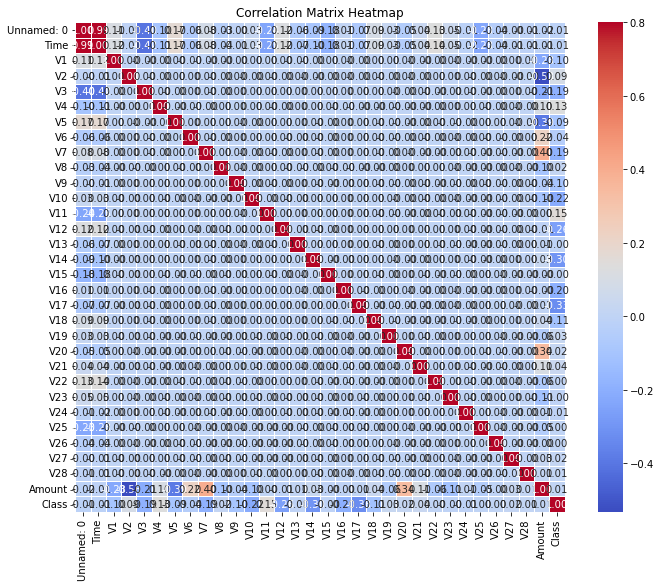

In [20]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmax=0.8, square=True, linewidths=.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

The HeatMap reveals that most features do not correlate with each other. However, some features exhibit either positive or negative correlations. For instance, V2 and V5 are strongly negatively correlated with the feature Amount, and there is also a correlation between V20 and Amount. This enhances our understanding of the available data.

In [21]:
# Splitting the dataset into features (X) and target (Y)
X = data.drop(columns='Class')
Y = data['Class']

# Displaying the shapes of X and Y
print(X.shape)
print(Y.shape)

# Converting DataFrame columns to NumPy arrays for faster processing
xData = X.to_numpy()
yData = Y.to_numpy()

(284807, 31)
(284807,)


## Training and Testing Data Separation
The dataset will be split into two primary groups: one for training the model and the other for testing the performance of the trained model.

In [22]:
# Import the train_test_split function from Scikit-learn
from sklearn.model_selection import train_test_split

# Divide the dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(
    xData, yData, test_size=0.2, random_state=42
)

In [23]:
# Import RandomForestClassifier from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the classifier on the training data
random_forest.fit(x_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(x_test)

In [25]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

# Calculate the number of outliers and errors
n_outliers = len(fraud_cases) 
n_errors = (y_pred != y_test).sum()  # Assumes 'y_pred' and 'y_test' are defined

# Print the model type
print("Model: Random Forest Classifier")

# Compute and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Optionally print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Model: Random Forest Classifier
Accuracy: 0.9996
Precision: 0.9753
Recall: 0.8061
F1-Score: 0.8827
Matthews Correlation Coefficient: 0.8865
Confusion Matrix:
[[56862     2]
 [   19    79]]


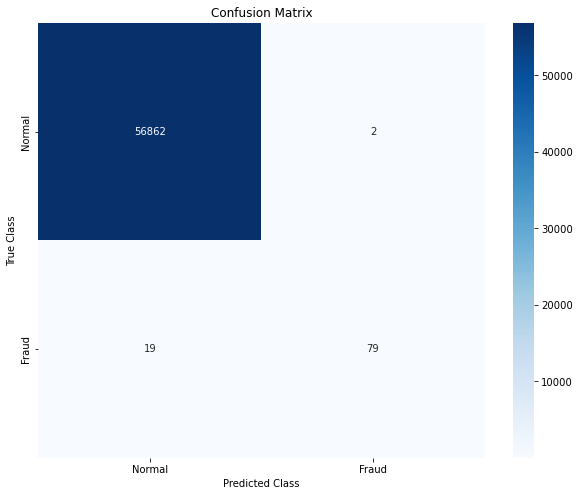

In [26]:
# Define class labels
labels = ['Normal', 'Fraud']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Ensure y_test and y_pred are defined

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()